## Install packages

In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## Generate graph

In [2]:
set.seed(12345)
pl = c(0.003,0.004,0.01,0.05,0.1)
gl_map = c()
for( p in pl){
    g = erdos.renyi.game(1000, p, directed=F)
    degreesVector <- degree(g)
    #hist(degreesVector)
    print(mean(degreesVector))
    print(is.connected(g))
    #print(var(degreesVector))
    #plot(g,vertex.size=1, vertex.label.cex=0.1)    
    g.components <- clusters(g)
    #print(g.components$csize)
    # which is the largest component
    ix <- which.max(g.components$csize)
    # get the subgraph correspondent to just the giant component
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    print(vcount(g.giant))
}

[1] 3.144
[1] FALSE
[1] 937
[1] 4.116
[1] FALSE
[1] 983
[1] 9.854
[1] TRUE
[1] 1000
[1] 50.34
[1] TRUE
[1] 1000
[1] 99.236
[1] TRUE
[1] 1000


In [3]:
pl2 = c(0.001, 0.002, 0.0025, 0.003,0.004,0.006,0.008,0.01,0.05,0.1)

In [4]:
print(rep('1',10))

 [1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"


In [5]:
x = c()
for(p in pl2){
    x = c(x, rep(p,100))
}

In [6]:
cl = c()
for( p in pl2){
    for(i in 1:100){
        g = erdos.renyi.game(1000, p, directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
       # print(vcount(g.giant)/1000)
        cl = c(cl,vcount(g.giant)/1000)
    }
    
}


In [7]:
library('RColorBrewer')
colbox<-brewer.pal(n=10,name="Set3")


In [8]:
cols_ = c()
for(x_ in x){
    cols_ = c(cols_,colbox[match(x,pl2)])
}


In [9]:
print(cols)

ERROR: Error in print(cols): object 'cols' not found


ERROR: Error in legend("bottomright", legend = pl2, col = cols, lwd = 1): object 'cols' not found


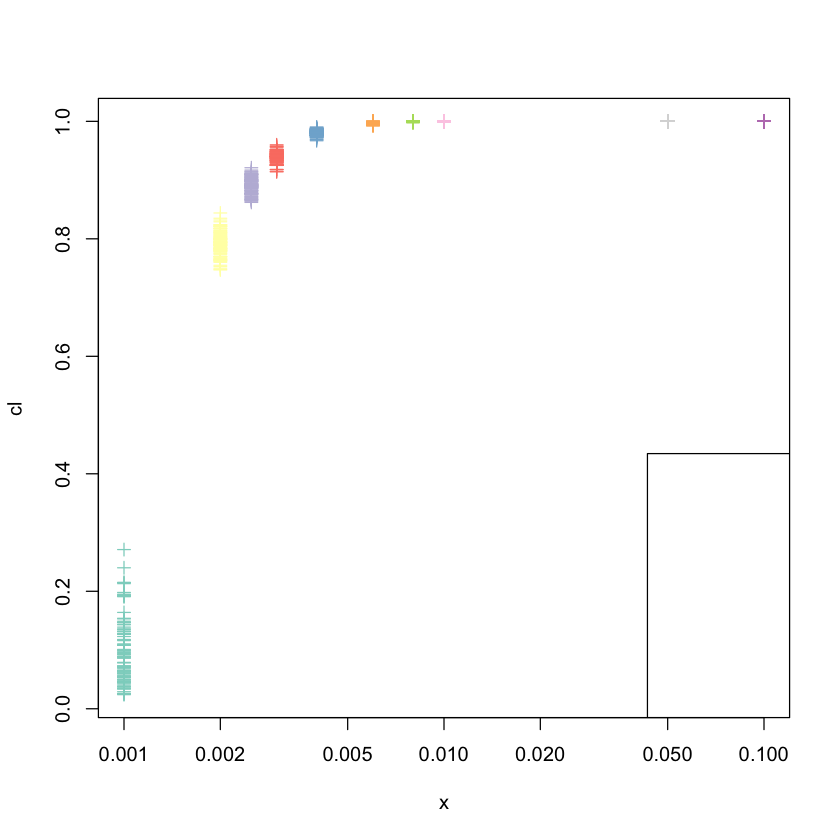

In [10]:
plot(x, cl, pch = 3,log='x', col = cols_)
legend("bottomright", legend=pl2,col=cols, lwd=1)


In [ ]:
c = 0.5


In [ ]:
get_expected_gcc <- function(deg){
    set.seed(12345)
    nrange <- 1:100
    iter <- 1:100
    cl =c()
    for(n in nrange){
        temp = c()
        for(i in iter){
        g = erdos.renyi.game(n*100, deg/(n*100), directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        #print(vcount(g.giant))
        temp = c(temp,vcount(g.giant))
        }
        cl = c(cl,mean(temp))
    }
    return(cl)
}

In [11]:
print(get_expected_gcc(0.5))

ERROR: Error in get_expected_gcc(0.5): could not find function "get_expected_gcc"


[1] 1.998
[1] TRUE
[1] 1000


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“12 y values <= 0 omitted from logarithmic plot”

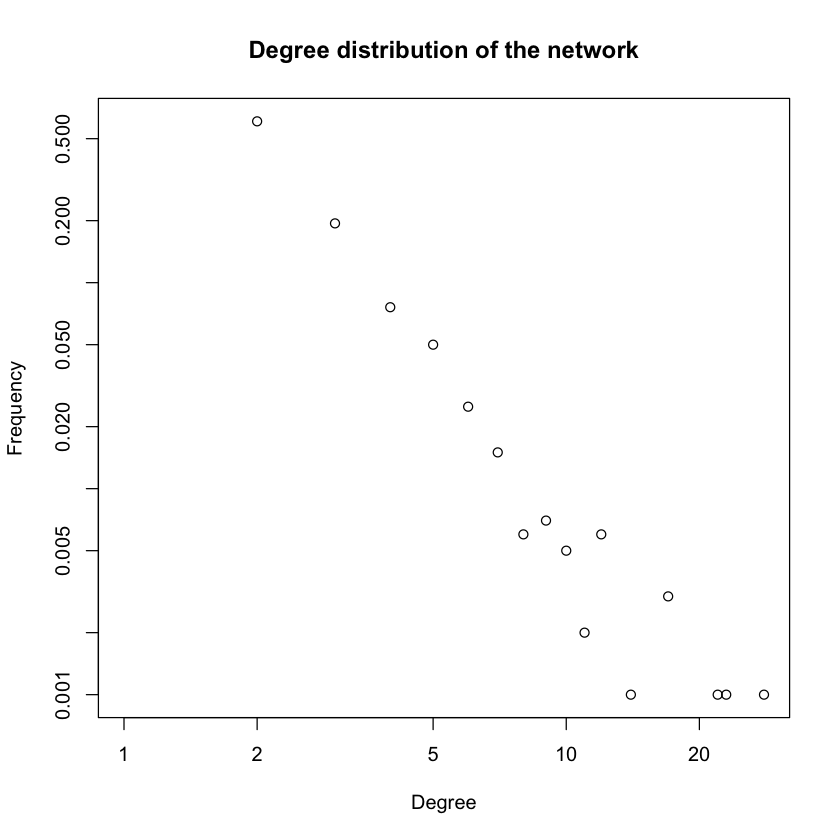

In [12]:
##check if its simple_pa
g = barabasi.game(1000, m=1, directed=F)
degreesVector <- degree(g)
#hist(degreesVector)
print(mean(degreesVector))
print(is.connected(g))
#print(var(degreesVector))
#plot(g,vertex.size=5, vertex.label.cex=0.1)    
g.components <- clusters(g)
#print(g.components$csize)
# which is the largest component
ix <- which.max(g.components$csize)
# get the subgraph correspondent to just the giant component
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fg <- fastgreedy.community(g)
#cmsize <- sizes(fg)
#print(cmsize)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')

In [13]:
modularity(g)

ERROR: Error in modularity.igraph(g): argument "membership" is missing, with no default


In [14]:
fc <- cluster_fast_greedy(g)
membership(fc)
sizes(fc)

   [1]  9 24 21  6 28  2  4 29  3  2  3 27  7 18 15  1  3 21  8  6  7 11  2 13
  [25] 20 22  2 18 29 12 16 22 14 19 16  4  9 16 13 24 24 28 14  7 12 17 19 12
  [49] 31  6 12 28  5 22  9  6  6  4 27 31 21  5 15 12  2 24  7 16 18 10 25 10
  [73] 29 30 13 15  4  3 10  1  4  4  3  9 14  4  1  9 17 10 10 12 14 13  3  6
  [97] 11  6  9 22 21  8 26 13  8  9 26 12 10  3 15 18 13 14  9 23 28  4  5  4
 [121]  1  4 18  1 11 20 24 20 14  4 22  3  6 14 11  6 31 16 16  7  6 22 26 12
 [145] 12 13 10 24 11 10  4 16  5 16 23 11  7 11 30 17 24  9  5  7 14  9  9  4
 [169] 16 15  2  8  9  5 12 14 26 23 27  3 25  2 23  9  8 27  3 20 15 21  1 17
 [193] 11  6  9 23  6  2 14  9  1 26 12 15 13  9  6 30  7  5  3 14  4  4  3 11
 [217] 23 10  8 13 11  5 18  5 17 19 11 10  2  2  6  5 13  2  4 13 15  1 24 18
 [241] 19 17  8 20 19 27  6 22 21 16 26  4  4 11 17  4 24 15  3  1 26 17 20 15
 [265]  3 20 26  5 17  4  6  9 24 21 17  2 10 10 10 25  2  2 27 11 29 30  7 13
 [289] 15  7 11  7  2  1  1  8  9 27 27  5  8 10 12 

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
47 46 44 54 45 49 38 37 43 42 36 35 40 35 32 33 38 28 26 26 32 23 22 31 21 21 
27 28 29 30 31 
19 15 15 16 11 

[1] 1.9998
[1] TRUE
[1] 10000


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“23 y values <= 0 omitted from logarithmic plot”

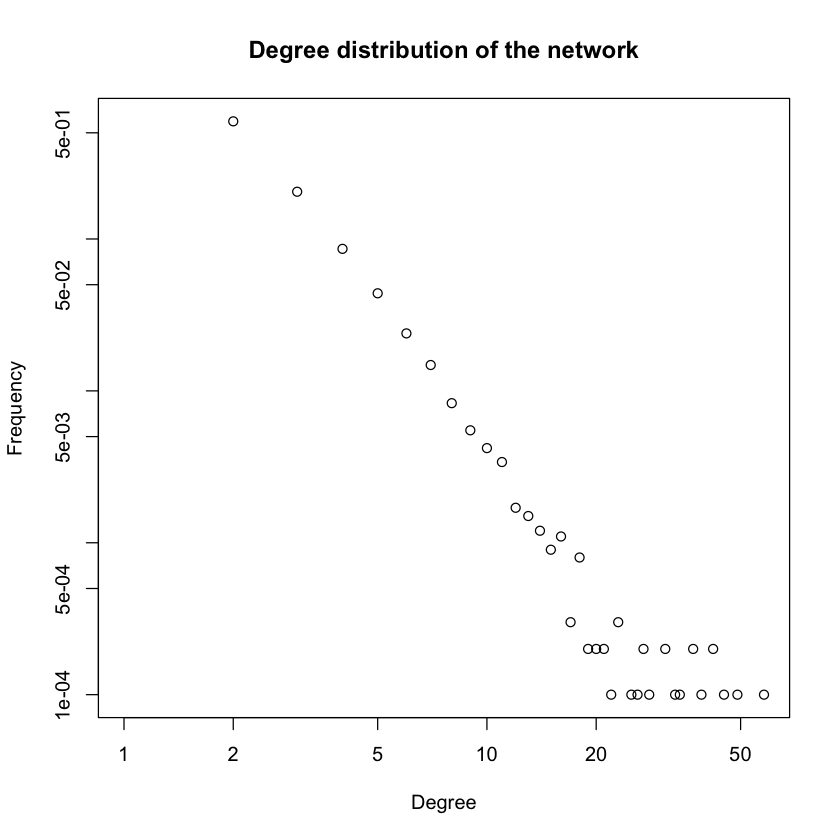

In [15]:
##check if its simple_pa
g = barabasi.game(10000, m=1, directed=F)
degreesVector <- degree(g)
#hist(degreesVector)
print(mean(degreesVector))
print(is.connected(g))
#print(var(degreesVector))
#plot(g,vertex.size=5, vertex.label.cex=0.1)    
g.components <- clusters(g)
#print(g.components$csize)
# which is the largest component
ix <- which.max(g.components$csize)
# get the subgraph correspondent to just the giant component
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fc <- cluster_fast_greedy(g)
#membership(fc)
#sizes(fc)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')

In [17]:
typeof(table(degreel)[1][1])

[1] "integer"

[1] 1.9998
[1] TRUE
[1] 10000


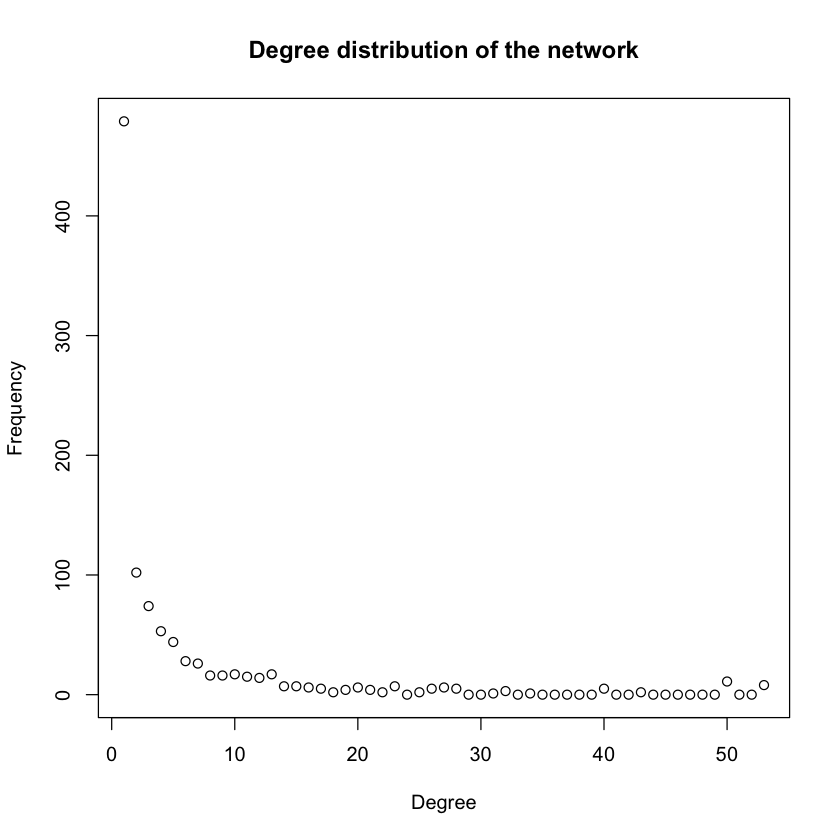

In [46]:
gsize = 10000
g = barabasi.game(gsize, m=1, directed=F)
degreesVector <- degree(g)
#hist(degreesVector)
print(mean(degreesVector))
print(is.connected(g))
#print(var(degreesVector))
#plot(g,vertex.size=5, vertex.label.cex=0.1)    
g.components <- clusters(g)
#print(g.components$csize)
# which is the largest component
ix <- which.max(g.components$csize)
# get the subgraph correspondent to just the giant component
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fc <- cluster_fast_greedy(g)
#membership(fc)
#sizes(fc)
#plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')
degreel = c()
for (v in sample(1:1000,1000)){
    neighs = neighbors(g,v)
    degree_ = 0
    if(length(neighs)>0){
        neigh2 = sample(neighs,1)
        degree_ = degree(g,neigh2)
        
    
    }
    degreel = c(degreel, degree_)
    
}
h <- hist(degreel, plot=F, breaks=max(degreel)-min(degreel)+1)
plot(h$counts,main="Degree distribution of the network",xlab="Degree",ylab="Frequency")


In [33]:
set.seed(12345)
dg_sum = rep(0,gsize)
for(i in c(1:1000)){
   g = barabasi.game(gsize, m=1, directed=F)
   dg_sum = dg_sum + degree(g)
}


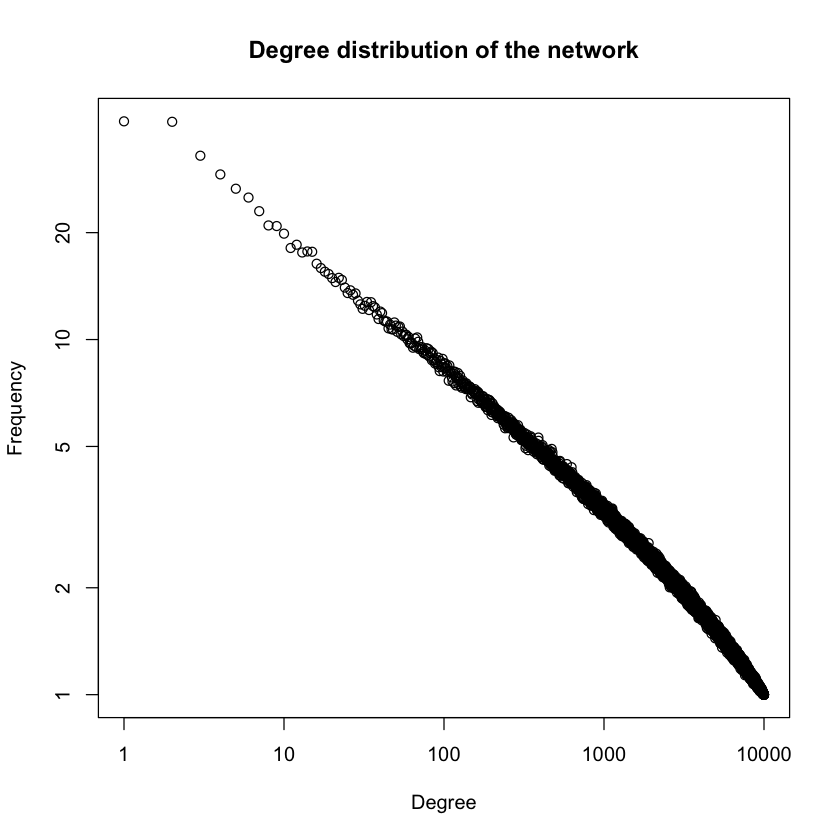

In [34]:
plot(dg_sum/1000,main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')


In [37]:
degree.distribution(g)

[1] 0.0000 0.5965 0.2003 0.0856 0.0452 0.0235 0.0157 0.0105 0.0058 0.0038
[11] 0.0026 0.0019 0.0022 0.0004 0.0009 0.0010 0.0006 0.0007 0.0006 0.0004
[21] 0.0003 0.0001 0.0001 0.0000 0.0000 0.0000 0.0000 0.0002 0.0003 0.0000
[31] 0.0002 0.0000 0.0000 0.0001 0.0001 0.0000 0.0001 0.0000 0.0000 0.0001
[41] 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[51] 0.0001